In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
root = 'first-scan/data/parsed/'

b_scans = []
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    b_scans.append(b_scan)

In [ ]:
def join_as_complex(array):
    rows = []
    rows.append(array[0])
    for i in range(3, len(array)):
        if i % 2 == 0:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [ ]:
for i in range(len(b_scans)):
    b_scans[i] = join_as_complex(b_scans[i])[:-4]

In [ ]:
def average_values(array):
    rows = []
    rows.append(array[0])
    for i in range(1, len(array), 4):
        row = []
        for j in range(len(array[i])):
            avg = (array[i][j] + array[i + 1][j] + array[i + 2][j] + array[i + 3][j]) / 4
            row.append(avg)
        rows.append(row)
    return rows

In [ ]:
b_scans = b_scans[:-1]

In [ ]:
frequencies = b_scans[0][0]
averages = []
for b_scan in b_scans:
    averages.append(average_values(b_scan)[1:])

In [ ]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

# create arrays for plotting
y = np.fft.irfft(averages[7][1])
t = np.arange(0, delta_t * len(y), delta_t)

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')
plt.plot(t*1e9, y, 'black')

plt.show()

In [ ]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')

for i in range(len(averages[5])):
    # create arrays for plotting
    new_average = np.zeros(200) + averages[7][i][:200]
    new_average = averages[0][i]
    y = np.fft.irfft(new_average)[:200] + i*0.01
    t = np.arange(0, delta_t * len(y), delta_t)

    plt.plot(t*1e9, y)

plt.show()

## B-scan parse

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root = 'first-scan/data2/parsed/'

b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()

In [3]:
len(b_scan)

511

In [4]:
def join_as_complex(array):
    rows = []
    rows.append(array[0])
    for i in range(1, len(array)):
        if i % 2 == 0:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [5]:
b_scan = join_as_complex(b_scan)
len(b_scan)

256

In [6]:
def average_values(array):
    rows = []
    for i in range(0, len(array), 5):
        row = []
        for j in range(len(array[i])):
            avg = (array[i][j] + array[i + 1][j] + array[i + 2][j] + array[i + 3][j] + array[i + 4][j]) / 5
            row.append(avg)
        rows.append(row)
    return rows

In [7]:
frequencies = b_scan[0]
b_scan = b_scan[2:] + [b_scan[1]]
len(b_scan)

255

In [8]:
b_scan = average_values(b_scan)
len(b_scan)

51

In [9]:
len(frequencies)

1000

delta_t = 0.11764844292285792ns


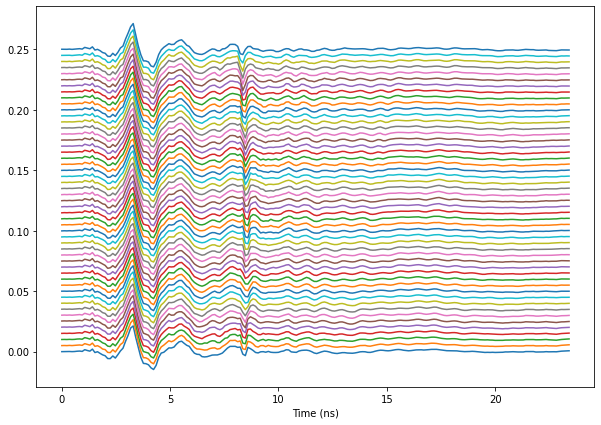

In [11]:
# calculate time step
delta_t = 1 / (frequencies[-1] - frequencies[0])
print('delta_t = ' + str(delta_t*1e9) + 'ns')

plt.figure(figsize=(10, 7))
plt.xlabel('Time (ns)')

for i in range(len(b_scan)):
    # create arrays for plotting
    y = np.fft.irfft(b_scan[i][0:1000])[:200] + i*0.005
    t = np.arange(0, delta_t * len(y), delta_t)

    plt.plot(t*1e9, y)

plt.show()

In [27]:
def draw_image(scan, cmap=None, aspect='auto'):
    plt.imshow(np.array(scan).transpose(), cmap=cmap, aspect='auto')

In [28]:
cut_b_scan = np.array(b_scan)[:, 250:600]
zeros = np.zeros((51, 250))
b_scan_filtered = np.concatenate((zeros, tmp), axis=1)

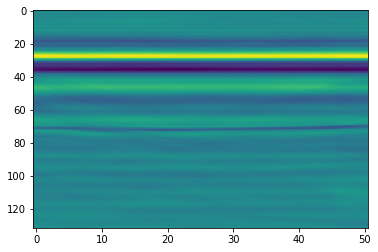

In [32]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, ::15])
draw_image(plot)

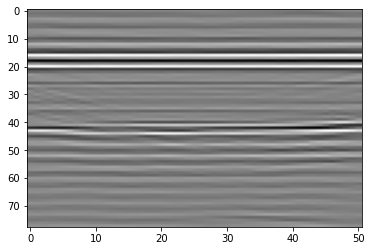

In [31]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::15])
draw_image(plot, cmap = 'gray')

### first_scan/data3

In [70]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [71]:
root = 'first-scan/data3/parsed/'
b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()

In [72]:
b_scan = join_as_complex(b_scan)
b_scan = b_scan[2:] + [b_scan[1]]

In [74]:
cut_b_scan = np.array(b_scan)[:, 250:600]
zeros = np.zeros((451, 250))
b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)

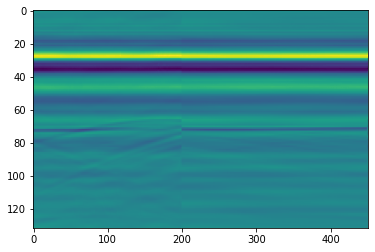

In [75]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, ::15])
draw_image(plot)

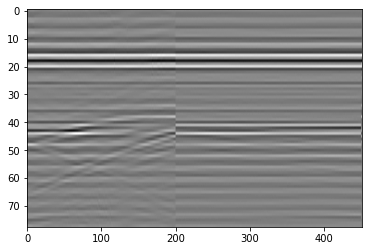

In [76]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::15])
draw_image(plot, cmap = 'gray')

### first_scan/data4

In [77]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [78]:
root = 'first-scan/data4/parsed/'
b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()

In [79]:
b_scan = join_as_complex(b_scan)
b_scan = b_scan[2:] + [b_scan[1]]

In [81]:
cut_b_scan = np.array(b_scan)[:, 250:600]
zeros = np.zeros((201, 250))
b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)

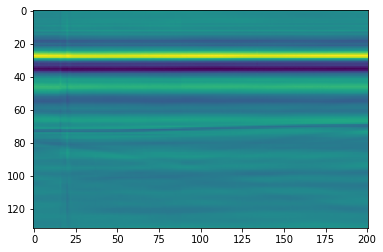

In [85]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, ::15])
draw_image(plot)

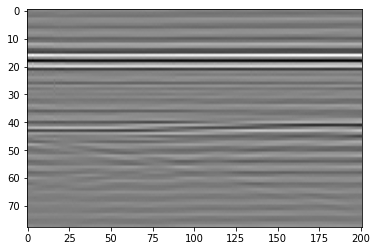

In [83]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::15])
draw_image(plot, cmap = 'gray')

### first_scan/data5

In [100]:
import os
import numpy as np
from matplotlib import pyplot as plt

root = 'first-scan/data5/parsed/'
b_scan = None
for file in sorted(os.listdir(root)):
    if '.npy' not in file:
        continue
    b_scan = np.loadtxt(root + file, comments='%', delimiter=',').transpose()
    break
    
b_scan = join_as_complex(b_scan)
b_scan = b_scan[2:] + [b_scan[1]]

cut_b_scan = np.array(b_scan)[:, 300:700]
zeros = np.zeros((201, 300))
b_scan_filtered = np.concatenate((zeros, cut_b_scan), axis=1)

In [101]:
frequencies[700]/1e9

5.9559858858858865

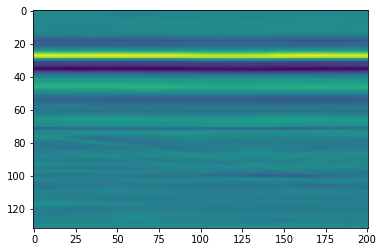

In [102]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan)[:, ::15])
draw_image(plot)

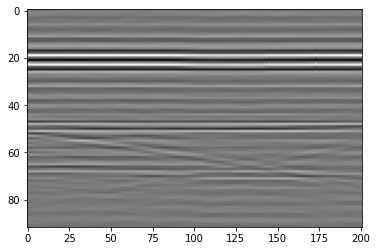

In [103]:
plot = np.apply_along_axis(np.fft.irfft, 1, np.array(b_scan_filtered)[:, ::15])
draw_image(plot, cmap = 'gray')